In [1]:
import numpy as np
import pandas as pd

In [2]:
daily_df = pd.read_parquet(r"D:\stock_prop_shop\.all\data\price_data\daily\daily_data.parquet")

In [3]:
daily_df = daily_df.drop_duplicates(subset=['date', 'order_book_id'])

In [4]:
close_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="close")
open_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="open")
volume_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="volume")

In [5]:
import performance as perf
import utils 
import tears
import plotting

In [6]:
ftr_stack = utils.get_clean_factor_and_forward_returns(volume_df / volume_df.rolling(20).mean().shift(1), close_df, quantiles=10, periods=(5,10,20))

Dropped 1.8% entries from factor data: 1.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Information Analysis


,5D,10D,20D
IC Mean,-0.033,-0.028,-0.025
IC Std.,0.089,0.083,0.079
IC_IR,-0.375,-0.333,-0.324
t-stat(IC),-13.297,-11.788,-11.463
p-value(IC),0.000,0.000,0.000
IC Skew,0.191,0.062,0.039
IC Kurtosis,0.714,0.788,0.746


c:\Users\41979\Desktop\assignment\utils.py:923: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,5D,10D,20D
Quantile 1 Mean Turnover,0.699,0.841,0.923
Quantile 2 Mean Turnover,0.856,0.891,0.912
Quantile 3 Mean Turnover,0.883,0.898,0.905
Quantile 4 Mean Turnover,0.890,0.898,0.899
Quantile 5 Mean Turnover,0.891,0.895,0.895
Quantile 6 Mean Turnover,0.888,0.892,0.894
Quantile 7 Mean Turnover,0.885,0.892,0.898
Quantile 8 Mean Turnover,0.882,0.894,0.903
Quantile 9 Mean Turnover,0.875,0.897,0.911
Quantile 10 Mean Turnover,0.827,0.902,0.933


,5D,10D,20D
Mean Factor Rank Autocorrelation,0.254,0.035,-0.123


<Figure size 640x480 with 0 Axes>

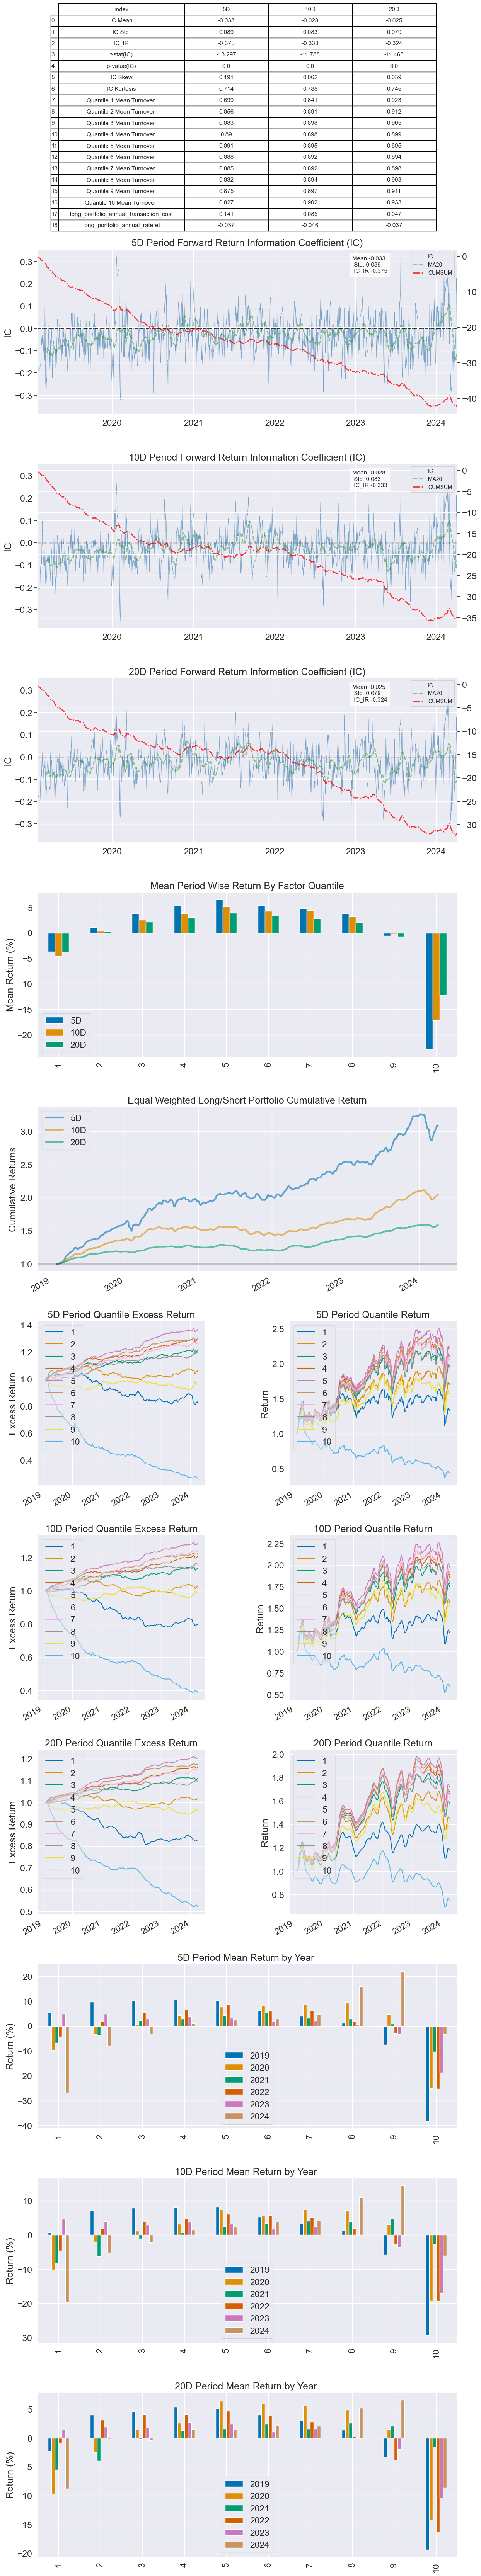

In [7]:
tears.create_summary_tear_sheet(ftr_stack, file_path ="./alpha_008/")